In [1]:
import torch
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO
from gazelle.model import get_gazelle_model

In [2]:
model, transform = torch.hub.load('fkryan/gazelle', 'gazelle_dinov2_vitb14')
model, transform = torch.hub.load('fkryan/gazelle', 'gazelle_dinov2_vitl14')
model, transform = torch.hub.load('fkryan/gazelle', 'gazelle_dinov2_vitb14_inout')
model, transform = torch.hub.load('fkryan/gazelle', 'gazelle_dinov2_vitl14_inout')

Using cache found in C:\Users\napochaan/.cache\torch\hub\fkryan_gazelle_main
Using cache found in C:\Users\napochaan/.cache\torch\hub\facebookresearch_dinov2_main
C:\Users\napochaan/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
C:\Users\napochaan/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
C:\Users\napochaan/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")
Using cache found in C:\Users\napochaan/.cache\torch\hub\fkryan_gazelle_main
Using cache found in C:\Users\napochaan/.cache\torch\hub\facebookresearch_dinov2_main
Using cache found in C:\Users\napochaan/.cache\torch\hub\fkryan_gazelle_main
Using cache found in C:\Us

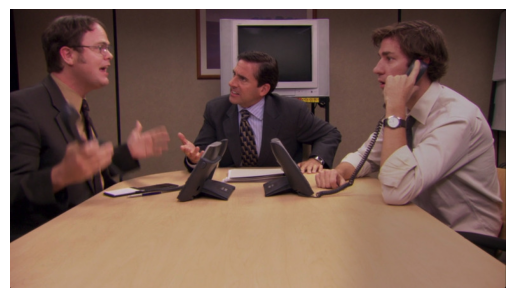

In [3]:
# load an input image

image_url = 'https://www.looper.com/img/gallery/the-office-funniest-moments-ranked/jim-and-dwights-customer-service-training-1627594561.jpg'
# image_url = "https://ew.com/thmb/n5b8Asz4Y5Lp0sSEF7WgS-ESyFc=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/succession-finale-052923-ec304aabcbf24a7b9fad891a87f49b74.jpg"
# image_url = "https://i.kym-cdn.com/entries/icons/original/000/045/575/blackcatzoningout_meme.jpg"

try:
    response = requests.get(image_url, stream=True)
    response.raise_for_status()

    image = Image.open(BytesIO(response.content)).convert('RGB')
    width, height = image.size

    plt.imshow(image)
    plt.axis('off')
    plt.show()

except requests.exceptions.RequestException as e:
    print(f'Error downloading image: {e}')

In [4]:
model, transform = get_gazelle_model('gazelle_dinov2_vitl14_inout')
# model.load_gazelle_state_dict(torch.load("/path/to/checkpoint.pt", weights_only=True))
model.eval()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

input = {
    'images': transform(image)
    .unsqueeze(dim=0)
    .to(device),  # tensor of shape [1, 3, 448, 448]
    'bboxes': [[(0.1, 0.2, 0.5, 0.7)]],  # list of lists of bbox tuples
}

with torch.no_grad():
    output = model(input)
predicted_heatmap = output['heatmap'][0][
    0
]  # access prediction for first person in first image. Tensor of size [64, 64]
predicted_inout = output['inout'][0][0]

Using cache found in C:\Users\napochaan/.cache\torch\hub\facebookresearch_dinov2_main
C:\Users\napochaan\Desktop\gazelle\.venv\Lib\site-packages\timm\models\vision_transformer.py:93: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  x = F.scaled_dot_product_attention(


In [5]:
predicted_heatmap, predicted_inout

(tensor([[0.4961, 0.4284, 0.5159,  ..., 0.4733, 0.5642, 0.4290],
         [0.5081, 0.4470, 0.4690,  ..., 0.4754, 0.5072, 0.4911],
         [0.4349, 0.4163, 0.4968,  ..., 0.4292, 0.4297, 0.3901],
         ...,
         [0.4767, 0.4816, 0.4551,  ..., 0.4901, 0.5235, 0.5627],
         [0.5628, 0.4567, 0.4981,  ..., 0.5151, 0.5938, 0.4707],
         [0.4814, 0.5216, 0.4800,  ..., 0.4548, 0.5148, 0.5288]],
        device='cuda:0'),
 tensor(0.3831, device='cuda:0'))